# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
passengers_titanic = pd.read_csv('../Titanic/data/Titanic_dataset.csv')

In [3]:
passengers_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


#### Data explanation

* PassengerId:

* Survived: 0 = No, 1 = Yes

* Pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

* Name: passenger name

* Sex: sex of passenger

* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* Sibsp: The dataset defines family relations in this way
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

* Parch: The dataset defines family relations in this way
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

* Ticket: ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

* Fare: the ticket fare

* Cabin: cabin number

* Embarked: port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Presented below figures shows how different variables are related to 'Survived'.

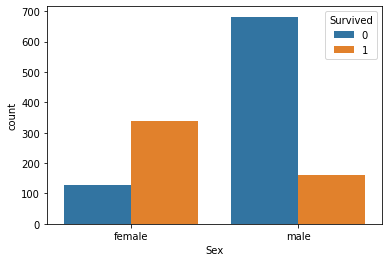

In [4]:
sns.countplot(x = 'Sex', hue = 'Survived', data = passengers_titanic)

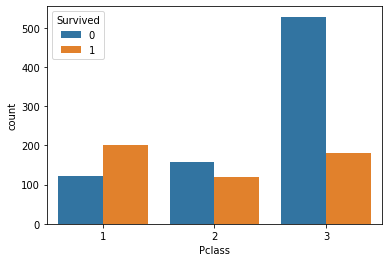

In [5]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = passengers_titanic)

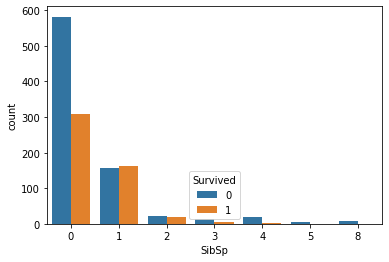

In [6]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = passengers_titanic)

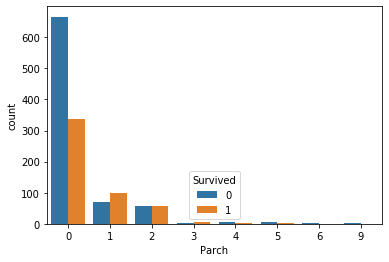

In [7]:
sns.countplot(x = 'Parch', hue = 'Survived', data = passengers_titanic)

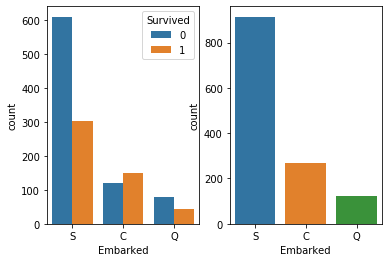

In [8]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Embarked', hue = 'Survived', data = passengers_titanic, ax=ax[0])
sns.countplot(x = 'Embarked', data = passengers_titanic, ax=ax[1])

(-50, 300)

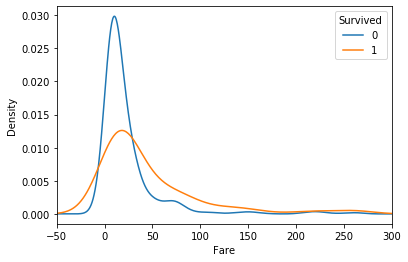

In [9]:
fig, ax = plt.subplots()
passengers_titanic.groupby('Survived').Fare.plot(kind = 'kde')
ax.legend(title = 'Survived')
plt.xlabel('Fare')
plt.xlim([-50, 300])

Text(0.5, 0, 'Age')

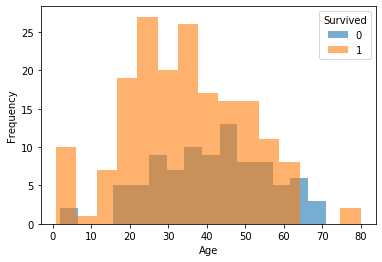

In [10]:
fig, ax = plt.subplots()
passengers_titanic.dropna().groupby('Survived').Age.plot(kind = 'hist', bins = 15, alpha = 0.6)
ax.legend(title = 'Survived')
plt.xlabel('Age')

#### To sum up figures above:
* males were more likely to die, when females were more likely to stay alive
* passengers of class 3 were the most likely to die
* chances to survive were greater when passenger was on the ship with family
* on the basis of plot presenting the chance of survival in relation to port of embarked it could be concluded that entering the ship in Southampton, increses the poslibility of death, which has no sense, but the second plot shows that this is only related to the fact that the 4/5 of the whole passengers embarked in Southampton
* for 'Fare' greater than 30 the chances of survival increase
* people older than 60 had higher chances to survive, the dominant age in deaths was in range 20 to 40, which is also the dominant age among all passengers of titanic.

In [11]:
passengers_titanic['Child'] = (passengers_titanic['Age'] < 10)
passengers_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,False
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,True
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,True
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,False
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,False
5,6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,False
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,False
7,8,0,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,False
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,False
9,10,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,False


# Feature engineering

In [12]:
X = passengers_titanic.drop('Survived', axis = 1)
y = passengers_titanic['Survived']

Split the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

Display all NaN's

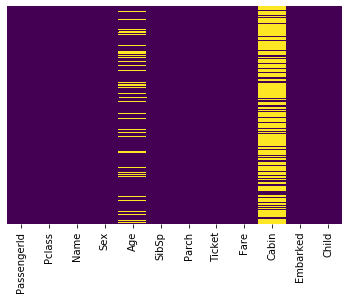

In [15]:
sns.heatmap(X_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

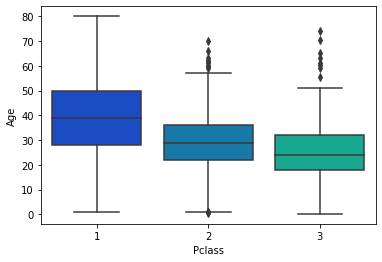

In [16]:
sns.boxplot(x = 'Pclass', y = 'Age', data = passengers_titanic, palette = 'winter')

Define a function which will replace the NaNs for age with mean, for each passenger class.

In [17]:
def impute_age(PassengerAge, PassengerClass):
    
    if pd.isnull(PassengerAge):

        if PassengerClass == 1:
            return 37

        elif PassengerClass == 2:
            return 29

        else:
            return 24

    else:
        return PassengerAge

In [18]:
X_train = X_train.copy(deep=True)
X_test = X_test.copy(deep=True)
X_train.loc[:, 'Age'] = X_train.apply(lambda x: impute_age(x['Age'], x['Pclass']), axis=1)
X_test.loc[:, 'Age'] = X_test.apply(lambda x: impute_age(x['Age'], x['Pclass']), axis=1)

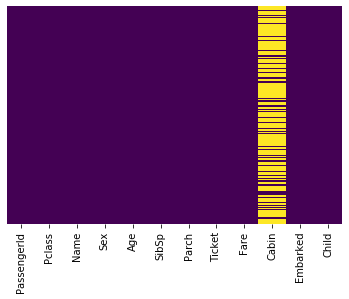

In [19]:
sns.heatmap(X_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

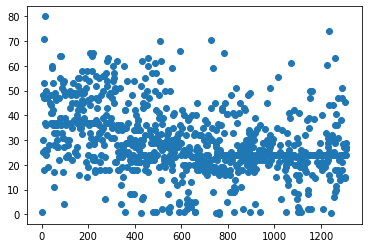

In [20]:
plt.scatter(X_train['PassengerId'], X_train['Age'])

In [21]:
meanFare = X_train.mean().Fare.round()

In [22]:
def impute_fare(PassengerFare, meanFare):
    
    if pd.isnull(PassengerFare):
        return meanFare
    else:
        return PassengerFare

In [23]:
X_train = X_train.copy(deep=True)
X_test = X_test.copy(deep=True)
X_train.loc[:, 'Fare'] = X_train.apply(lambda x: impute_fare(x['Fare'], meanFare), axis=1)
X_test.loc[:, 'Fare'] = X_test.apply(lambda x: impute_age(x['Fare'], meanFare), axis=1)

Define a function which will create new column title basing on list presented below

In [24]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
384,385,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0000,NaN,S,False
597,598,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,NaN,S,False
626,627,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,False
917,918,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C,False
544,545,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,False


In [25]:
titles = set()
for name in X_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Major', 'Jonkheer', 'Col', 'Ms', 'Miss', 'Dr', 'Mlle', 'the Countess', 'Mr', 'Rev', 'Master', 'Mrs'}


In [26]:
def add_titles(dataframe):
    dataframe['Title'] = dataframe['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    return dataframe

def add_social_group(dataframe):
    
    Title_Dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Sir" : "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess":"Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr" : "Mr",
        "Mrs" : "Mrs",
        "Miss" : "Miss",
        "Master" : "Master",
        "Lady" : "Royalty"
    }
    
    dataframe['Title'] = dataframe.Title.map(Title_Dictionary)
    
    return dataframe

In [27]:
X_train = X_train.copy()
X_test = X_test.copy()
X_train = add_titles(X_train)
X_test= add_titles(X_test)
X_train = add_social_group(X_train)
X_test= add_social_group(X_test)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Title
384,385,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0000,NaN,S,False,Mr
597,598,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,NaN,S,False,Mr
626,627,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,False,Miss
917,918,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C,False,Mr
544,545,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,False,Mr


In [28]:
def get_cabin(dataframe):
    
    # replacing missing cabins with U (for Uknown)
    dataframe.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    dataframe['Cabin'] = dataframe['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(dataframe['Cabin'], prefix='Cabin')    
    dataframe = pd.concat([dataframe, cabin_dummies], axis=1)

    dataframe.drop('Cabin', axis=1, inplace=True)
    #status('cabin')
    return dataframe

In [29]:
X_train = X_train.copy()
X_test = X_test.copy()
X_train = get_cabin(X_train)
X_test = get_cabin(X_test)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Child,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U
384,385,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0000,S,False,Mr,0,0,0,0,0,0,0,1
597,598,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,False,Mr,0,0,0,0,0,0,0,1
626,627,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,S,False,Miss,0,0,0,0,0,0,0,1
917,918,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,False,Mr,0,0,0,0,0,0,0,1
544,545,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,S,False,Mr,0,0,0,0,0,0,0,1


Make a function which will create new feature which will represent the size of family (including the passenger)
and other three which will be based on the family size.

In [30]:
def process_family(dataframe):
    
    dataframe['FamilySize'] = dataframe['Parch'] + dataframe['SibSp'] + 1
    
    dataframe['Singleton'] = dataframe['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataframe['SmallFamily'] = dataframe['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    dataframe['LargeFamily'] = dataframe['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return dataframe

In [31]:
X_train = process_family(X_train)
X_test = process_family(X_test)

In [32]:
passengers_titanic.iloc[[1225]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
1225,1226,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False


In [33]:
X_train[X_train.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,Singleton,SmallFamily,LargeFamily


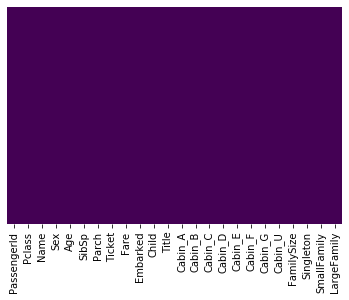

In [34]:
sns.heatmap(X_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Replace categorical variables with dummies

In [35]:
def dummies(dataframe):
    sex = pd.get_dummies(dataframe['Sex'], drop_first = True)
    embarked = pd.get_dummies(dataframe['Embarked'], drop_first = True)
    pclass = pd.get_dummies(dataframe['Pclass'], drop_first = True)
    child = pd.get_dummies(dataframe['Child'], drop_first = True)
    title = pd.get_dummies(dataframe['Title'], drop_first = True)
    PassengerId = dataframe['PassengerId']
    dataframe_relevant = dataframe.drop(['Name', 'Sex', 'Ticket', 'Embarked',
                               'Pclass', 'Child', 'PassengerId', 'Title'], axis = 1)
    dataframe_relevant = pd.concat([dataframe_relevant, sex, embarked, pclass, child, title], axis = 1)
    return dataframe_relevant

In [36]:
train_relevant = dummies(X_train)
test_relevant = dummies(X_test)
train_relevant.head()

,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Q,S,2,3,True,Miss,Mr,Mrs,Officer,Royalty
384,29.0,0,0,0.0000,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
597,29.0,0,0,13.0000,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
626,38.0,4,2,7.7750,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
917,39.0,0,1,13.4167,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
544,34.0,1,0,21.0000,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


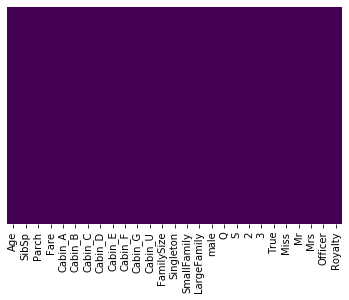

In [37]:
sns.heatmap(train_relevant.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Scale the features, except dependent variable

In [38]:
def scale(dataframe):
    scaled_features = dataframe.copy()
    col_names = scaled_features.loc[:, scaled_features.columns != 'Survived'].columns
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features

In [39]:
train_scaled = scale(train_relevant)
test_scaled = scale(test_relevant)
train_scaled.head()

,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Q,S,2,3,True,Miss,Mr,Mrs,Officer,Royalty
384,-0.010079,-0.465561,-0.444607,-0.657319,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
597,-0.010079,-0.465561,-0.444607,-0.390680,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
626,0.667326,3.088219,1.836961,-0.497848,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,...,-0.317744,0.653293,-0.540334,0.916165,-0.264752,2.036189,-1.171775,-0.42475,-0.149404,-0.046778
917,0.742594,-0.465561,0.696177,-0.382133,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,...,-0.317744,-1.530708,-0.540334,0.916165,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
544,0.366257,0.422884,-0.444607,-0.226595,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778


Calculate the correlation matrix and plot the heatmap.

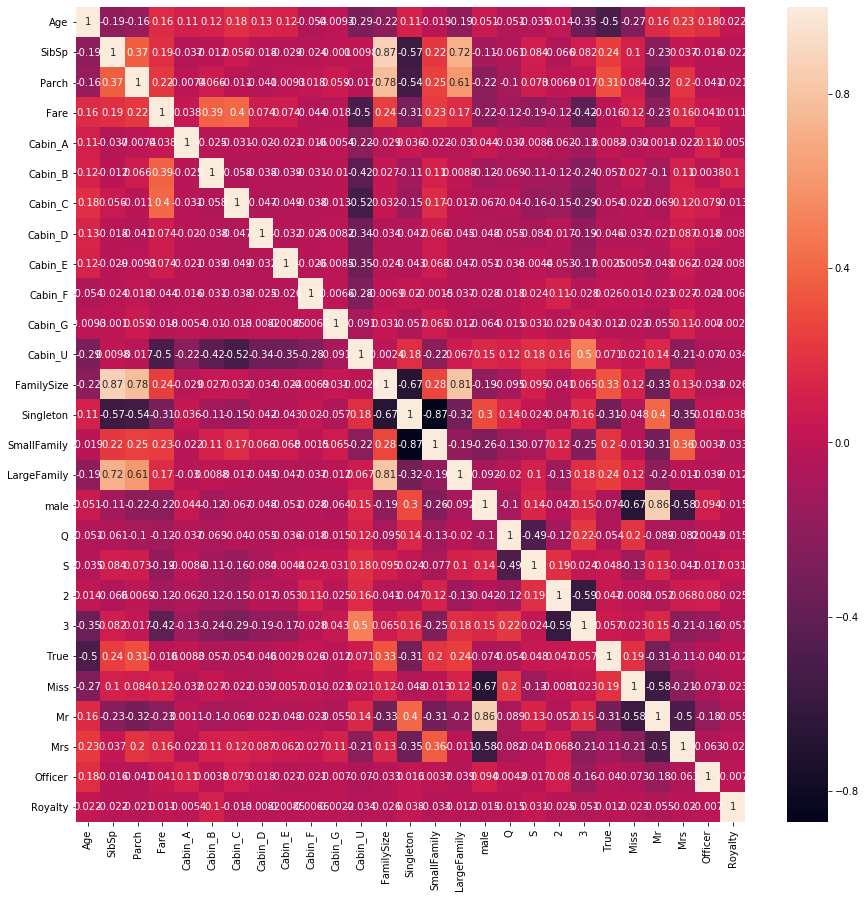

In [40]:
corr = train_scaled.corr()

fig, ax = plt.subplots(figsize = (15, 15)) #Sample figsize in inches
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, ax = ax)

Remove highly colerated feautures: Parch, SibSp, FamilySize, Singleton.

In [41]:
def remove_colerated(dataframe):
    dataframe = dataframe.drop(['Parch', 'SibSp', 'FamilySize', 'Singleton'], axis = 1)
    return dataframe

In [42]:
train_scaled = remove_colerated(train_scaled)
test_scaled = remove_colerated(test_scaled)
train_scaled.head()

,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,...,Q,S,2,3,True,Miss,Mr,Mrs,Officer,Royalty
384,-0.010079,-0.657319,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,-0.046778,0.513272,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
597,-0.010079,-0.390680,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,-0.046778,0.513272,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
626,0.667326,-0.497848,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,-0.046778,0.513272,...,-0.317744,0.653293,-0.540334,0.916165,-0.264752,2.036189,-1.171775,-0.42475,-0.149404,-0.046778
917,0.742594,-0.382133,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,-0.046778,0.513272,...,-0.317744,-1.530708,-0.540334,0.916165,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778
544,0.366257,-0.226595,-0.115214,-0.216465,-0.269443,-0.174273,-0.180816,-0.141579,-0.046778,0.513272,...,-0.317744,0.653293,1.850708,-1.091507,-0.264752,-0.491113,0.853406,-0.42475,-0.149404,-0.046778


Again calculate the correlation matrix and plot the heatmap.

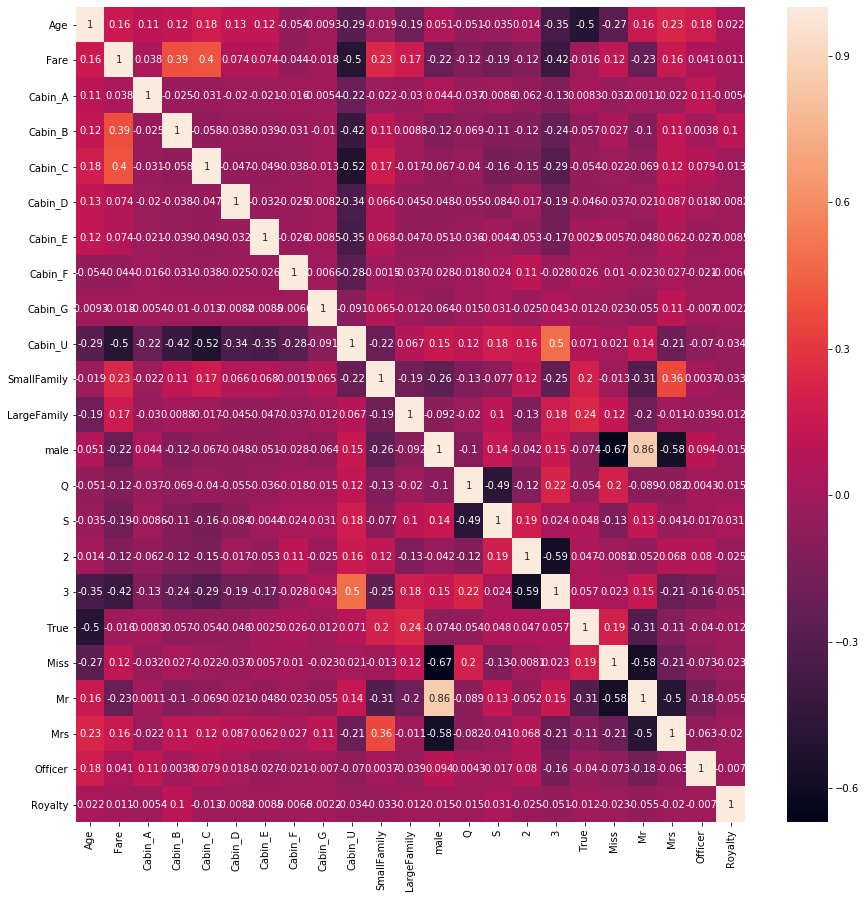

In [43]:
corr = train_scaled.corr()

fig, ax = plt.subplots(figsize = (15, 15)) #Sample figsize in inches
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, ax = ax)

# Model selection

#### Test listed below classification algorithms in order to select the best one basing on score.

In [44]:
names = ["Logistic Regression", "MLPClassifier","K-Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost", " GaussianNB", "QDA", "XGBClassifier"]

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [46]:
classifiers = [
    LogisticRegression(solver='liblinear'),
    MLPClassifier(max_iter=1000),
    KNeighborsClassifier(),
    SVC(kernel = "linear", C = 0.025),
    SVC(gamma = 2, C = 1),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

Iterate over classifiers

In [47]:
missing_col_zeros = pd.DataFrame(0,
                                 index=test_scaled.index,
                                 columns=list(set(train_scaled.columns) - set(test_scaled.columns)))
missing_col_zeros = missing_col_zeros.astype(float)

In [48]:
# Add matrix of zeros to have the same columns for both test and training dataframes
test_scaled = pd.concat([test_scaled, missing_col_zeros], axis=1)
test_scaled = test_scaled[train_scaled.columns]
test_scaled.head()

,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,...,Q,S,2,3,True,Miss,Mr,Mrs,Officer,Royalty
931,-0.406328,-0.491260,-0.161585,-0.255031,-0.297729,-0.225393,-0.177471,-0.087706,-0.087706,0.599885,...,3.012793,-1.499311,-0.465530,0.928741,-0.243514,-0.521387,0.855148,-0.424476,-0.087706,-0.087706
254,0.613283,-0.098390,-0.161585,-0.255031,3.358757,-0.225393,-0.177471,-0.087706,-0.087706,-1.666987,...,-0.331918,0.666973,-0.465530,-1.076727,-0.243514,-0.521387,0.855148,-0.424476,-0.087706,-0.087706
583,0.848578,-0.352968,-0.161585,-0.255031,-0.297729,-0.225393,-0.177471,-0.087706,-0.087706,0.599885,...,-0.331918,0.666973,2.148089,-1.076727,-0.243514,-0.521387,-1.169389,2.355844,-0.087706,-0.087706
568,-0.837702,-0.400432,-0.161585,-0.255031,-0.297729,-0.225393,-0.177471,11.401754,-0.087706,-1.666987,...,-0.331918,0.666973,2.148089,-1.076727,-0.243514,-0.521387,0.855148,-0.424476,-0.087706,-0.087706
483,-0.014170,-0.055241,-0.161585,-0.255031,-0.297729,-0.225393,-0.177471,-0.087706,-0.087706,0.599885,...,-0.331918,0.666973,2.148089,-1.076727,-0.243514,1.917960,-1.169389,-0.424476,-0.087706,-0.087706


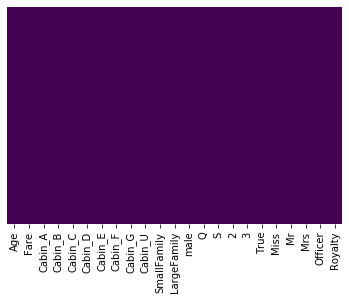

In [49]:
sns.heatmap(train_scaled.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [50]:
score = []
for name, clf in zip(names, classifiers):
    clf.fit(train_scaled, y_train)
    score.append(clf.score(test_scaled, y_test))

C:\Users\mjur1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [51]:
score

[0.8142493638676844,
 0.7837150127226463,
 0.7709923664122137,
 0.7964376590330788,
 0.7455470737913485,
 0.7837150127226463,
 0.6819338422391857,
 0.7786259541984732,
 0.7989821882951654,
 0.7480916030534351,
 0.3893129770992366,
 0.7938931297709924]

In [52]:
scores = pd.DataFrame()
scores['name'] = names
scores['score'] = score
scores.sort_values(by = ['score'], ascending = False, inplace = True)

Text(0, 0.5, 'Algorithm')

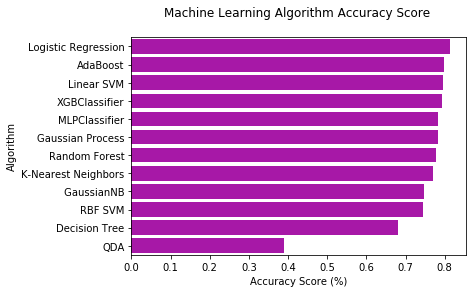

In [53]:
sns.barplot(x = scores.score, y = scores.name, data = scores, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

The several algorithms have similar scores, from them I have chosen XGBClassifier (eXtreme Gradient Boosting) one of the most popular. Generaly speaking XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

# XGBoost parameters tuning 

#### Selection of starting parameteres:
* max_depth = 5 : Should be between 3-10.
* min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
* gamma = 0
* subsample, colsample_bytree = 0.8 : Commonly used used start value. Typical values range between 0.5-0.9.
* scale_pos_weight = 1: Because of high class imbalance.

In [54]:
predictors = [x for x in train_scaled.columns]
xgb1 = XGBClassifier(
 learning_rate = 0.1,
 n_estimators = 1000,
 max_depth = 5,
 min_child_weight = 1,
 gamma = 0,
 subsample = 0.8,
 colsample_bytree = 0.8,
 objective = 'binary:logistic',
 nthread = 4,
 scale_pos_weight = 1,
 seed = 27)
xgb1.fit(train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [55]:
predicitions = xgb1.predict(test_scaled).astype(int)

In [56]:
features = pd.DataFrame()
features['feature'] = train_scaled.columns
features['importance'] = xgb1.feature_importances_
features.sort_values(by = ['importance'], ascending = True, inplace = True)
features.set_index('feature', inplace = True)

Text(0, 0.5, 'Feature')

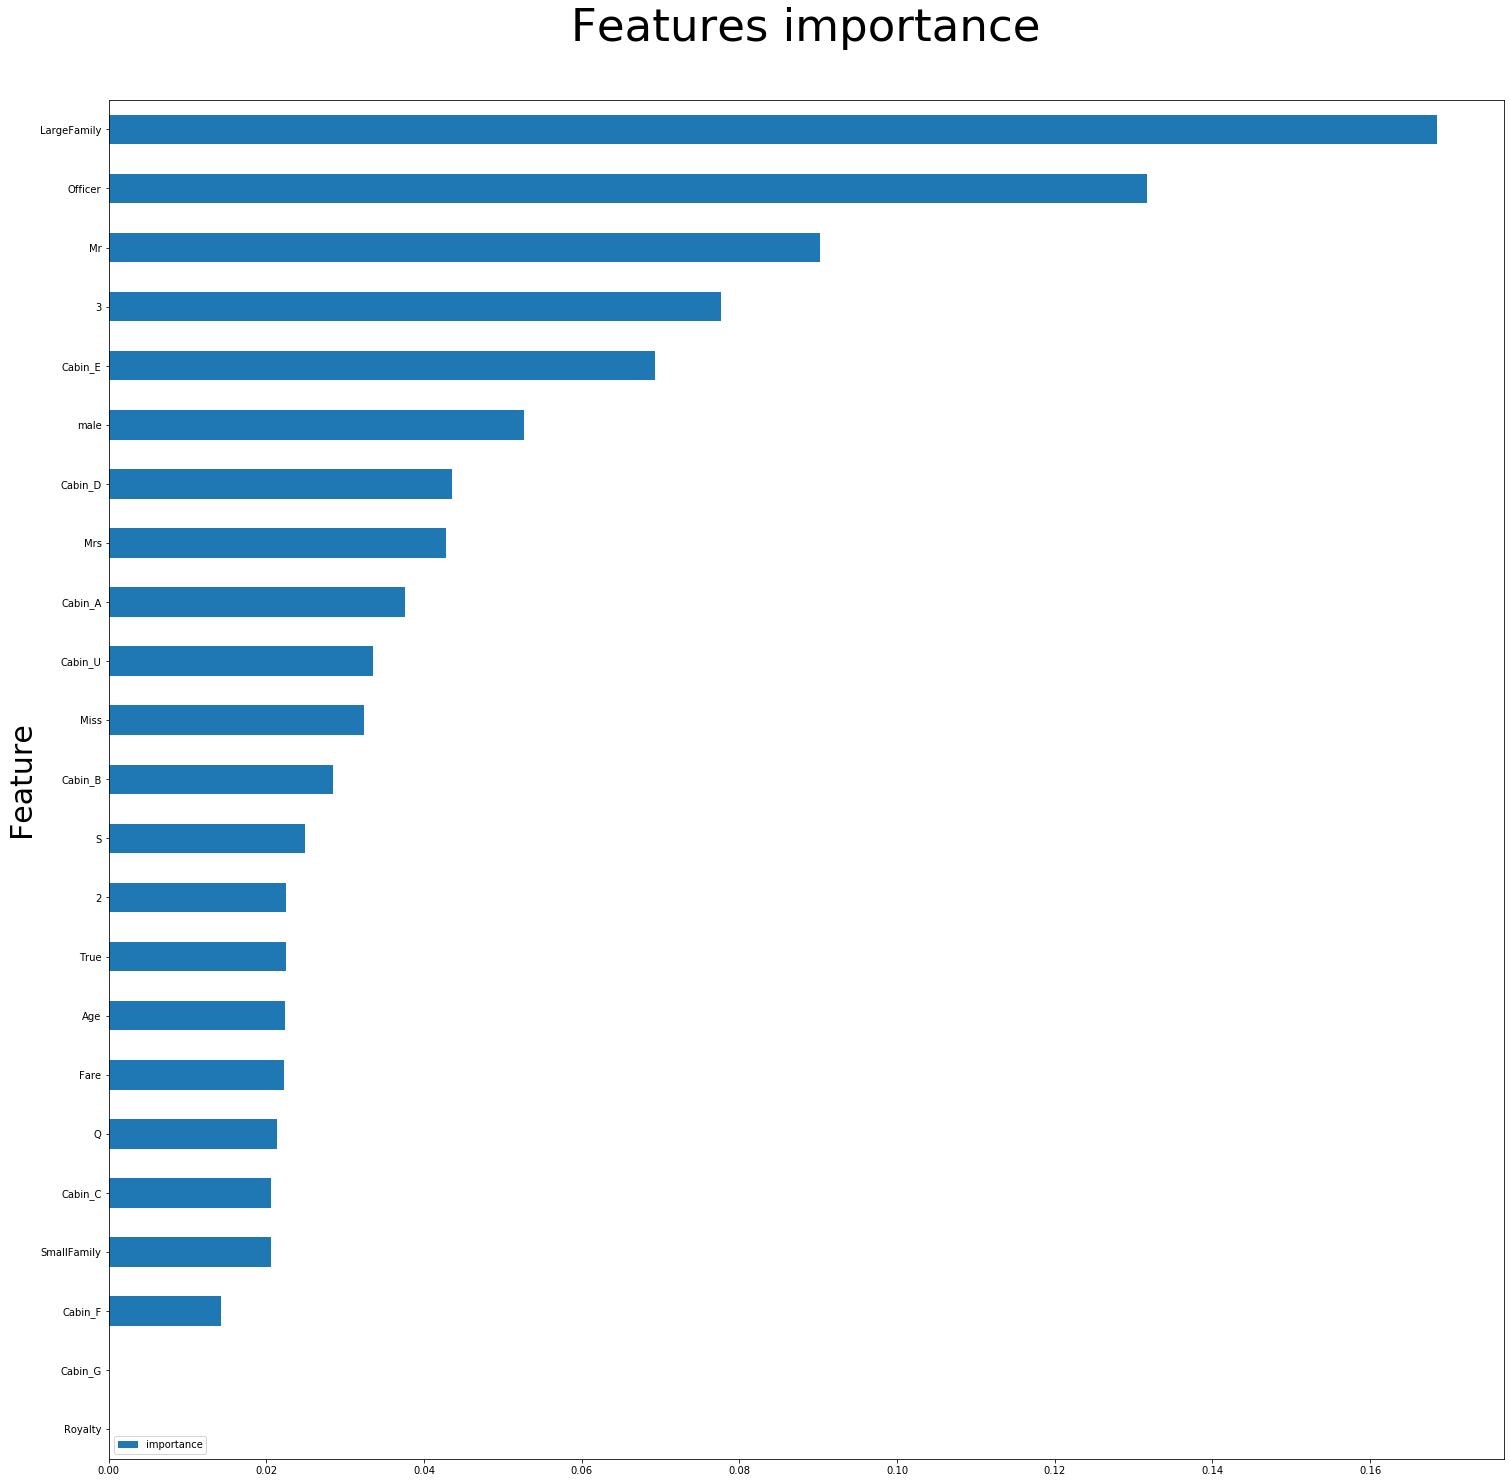

In [57]:
features.plot(kind = 'barh', figsize = (25, 25))
plt.title('Features importance\n', fontsize=45)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.ylabel('Feature', fontsize=30)

Removal of less relevant features.

In [58]:
train_scaled = train_scaled.drop(['Royalty', True, 'Cabin_G', 'Cabin_F', 'Cabin_A',
                                  'Cabin_B', 'Cabin_E', 'Cabin_D', 'Officer', 'LargeFamily', 'Mrs'],
                                 axis = 1)
test_scaled = test_scaled.drop(['Royalty', True, 'Cabin_G', 'Cabin_F', 'Cabin_A',
                                  'Cabin_B', 'Cabin_E', 'Cabin_D', 'Officer', 'LargeFamily', 'Mrs'],
                                 axis = 1)

Use grid search and cross-validation to tune the model

In [59]:
from sklearn.model_selection import GridSearchCV 

#### Tune tree-specific parameters (max_depth, min_child_weight, gamma, subsample, colsample_bytree) in order to decide learning rate and number of trees.

In [60]:
predictors = [x for x in train_scaled.columns]
param_test1 = {
 'max_depth':range(3,12,2),
 'min_child_weight':range(1,8,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 5,
 min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27, return_train_score = False), 
 param_grid = param_test1, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch1.fit(train_scaled[predictors], y_train)
gsearch1.cv_results_['params'], gsearch1.best_params_, gsearch1.best_score_

([{'max_depth': 3, 'min_child_weight': 1},
  {'max_depth': 3, 'min_child_weight': 3},
  {'max_depth': 3, 'min_child_weight': 5},
  {'max_depth': 3, 'min_child_weight': 7},
  {'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 3},
  {'max_depth': 5, 'min_child_weight': 5},
  {'max_depth': 5, 'min_child_weight': 7},
  {'max_depth': 7, 'min_child_weight': 1},
  {'max_depth': 7, 'min_child_weight': 3},
  {'max_depth': 7, 'min_child_weight': 5},
  {'max_depth': 7, 'min_child_weight': 7},
  {'max_depth': 9, 'min_child_weight': 1},
  {'max_depth': 9, 'min_child_weight': 3},
  {'max_depth': 9, 'min_child_weight': 5},
  {'max_depth': 9, 'min_child_weight': 7},
  {'max_depth': 11, 'min_child_weight': 1},
  {'max_depth': 11, 'min_child_weight': 3},
  {'max_depth': 11, 'min_child_weight': 5},
  {'max_depth': 11, 'min_child_weight': 7}],
 {'max_depth': 11, 'min_child_weight': 5},
 0.8751398021795543)

In [61]:
param_test2 = {
 'max_depth':[4, 5, 6],
 'min_child_weight':[4, 5, 6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_scaled[predictors], y_train)
gsearch2.cv_results_['params'], gsearch2.best_params_, gsearch2.best_score_

([{'max_depth': 4, 'min_child_weight': 4},
  {'max_depth': 4, 'min_child_weight': 5},
  {'max_depth': 4, 'min_child_weight': 6},
  {'max_depth': 5, 'min_child_weight': 4},
  {'max_depth': 5, 'min_child_weight': 5},
  {'max_depth': 5, 'min_child_weight': 6},
  {'max_depth': 6, 'min_child_weight': 4},
  {'max_depth': 6, 'min_child_weight': 5},
  {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 6, 'min_child_weight': 4},
 0.8746120222320583)

In [62]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators = 140, max_depth = 5,
 min_child_weight = 5, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27), 
 param_grid = param_test3, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch3.fit(train_scaled[predictors], y_train)
gsearch3.cv_results_['params'], gsearch3.best_params_, gsearch3.best_score_
gsearch3.cv_results_['mean_test_score']

array([0.87313923, 0.87310524, 0.87347485, 0.87382992, 0.87496196])

In [63]:
xgb2 = XGBClassifier(
 learning_rate = 0.1,
 n_estimators = 1000,
 max_depth = 5,
 min_child_weight = 5,
 gamma = 0.3,
 subsample = 0.8,
 colsample_bytree = 0.8,
 objective = 'binary:logistic',
 nthread = 4,
 scale_pos_weight = 1,
 seed = 27)
xgb2.fit(train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [64]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators = 177, max_depth = 5,
 min_child_weight = 5, gamma = 0.3, subsample = 0.8, colsample_bytree = 0.8,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27), 
 param_grid = param_test4, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch4.fit(train_scaled[predictors], y_train)
gsearch4.cv_results_['params'], gsearch4.best_params_, gsearch4.best_score_

([{'colsample_bytree': 0.6, 'subsample': 0.6},
  {'colsample_bytree': 0.6, 'subsample': 0.7},
  {'colsample_bytree': 0.6, 'subsample': 0.8},
  {'colsample_bytree': 0.6, 'subsample': 0.9},
  {'colsample_bytree': 0.7, 'subsample': 0.6},
  {'colsample_bytree': 0.7, 'subsample': 0.7},
  {'colsample_bytree': 0.7, 'subsample': 0.8},
  {'colsample_bytree': 0.7, 'subsample': 0.9},
  {'colsample_bytree': 0.8, 'subsample': 0.6},
  {'colsample_bytree': 0.8, 'subsample': 0.7},
  {'colsample_bytree': 0.8, 'subsample': 0.8},
  {'colsample_bytree': 0.8, 'subsample': 0.9},
  {'colsample_bytree': 0.9, 'subsample': 0.6},
  {'colsample_bytree': 0.9, 'subsample': 0.7},
  {'colsample_bytree': 0.9, 'subsample': 0.8},
  {'colsample_bytree': 0.9, 'subsample': 0.9}],
 {'colsample_bytree': 0.7, 'subsample': 0.8},
 0.8757569761263492)

In [65]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators = 177, max_depth = 5,
 min_child_weight = 5, gamma = 0.3, subsample = 0.8, colsample_bytree = 0.8,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1,seed = 27), 
 param_grid = param_test5, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch5.fit(train_scaled[predictors], y_train)
gsearch5.cv_results_['params'], gsearch5.best_params_, gsearch5.best_score_

([{'colsample_bytree': 0.75, 'subsample': 0.75},
  {'colsample_bytree': 0.75, 'subsample': 0.8},
  {'colsample_bytree': 0.75, 'subsample': 0.85},
  {'colsample_bytree': 0.8, 'subsample': 0.75},
  {'colsample_bytree': 0.8, 'subsample': 0.8},
  {'colsample_bytree': 0.8, 'subsample': 0.85},
  {'colsample_bytree': 0.85, 'subsample': 0.75},
  {'colsample_bytree': 0.85, 'subsample': 0.8},
  {'colsample_bytree': 0.85, 'subsample': 0.85}],
 {'colsample_bytree': 0.75, 'subsample': 0.85},
 0.8751255350766296)

#### Tune regularization parameters (lambda, alpha) which can help reduce model complexity and enhance performance.

In [66]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators = 177, max_depth = 5,
 min_child_weight = 5, gamma = 0.3, subsample = 0.8, colsample_bytree = 0.75,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27), 
 param_grid = param_test6, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch6.fit(train_scaled[predictors], y_train)
gsearch6.cv_results_['params'], gsearch6.best_params_, gsearch6.best_score_

([{'reg_alpha': 1e-05},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.1},
  {'reg_alpha': 1},
  {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.8759289335304403)

Test for reg_alpha values around the one with best score 0.01.

In [67]:
param_test7 = {
 'reg_alpha':[1e-9, 1e-7, 1e-5, 1e-2, 0.1, 1, 10]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.1, n_estimators = 177, max_depth = 5,
 min_child_weight = 5, gamma = 0.3, subsample = 0.8, colsample_bytree = 0.75,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27), 
 param_grid = param_test7, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch7.fit(train_scaled[predictors], y_train)
gsearch7.cv_results_['params'], gsearch7.best_params_, gsearch7.best_score_

([{'reg_alpha': 1e-09},
  {'reg_alpha': 1e-07},
  {'reg_alpha': 1e-05},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.1},
  {'reg_alpha': 1},
  {'reg_alpha': 10}],
 {'reg_alpha': 0.1},
 0.8759289335304403)

Score is the same as for reg_alpha = 0.01 so it has now sense to lower it down further.

#### Check in the same way lambda

In [68]:
param_test8 = {
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 2, 3, 4, 5, 10, 20, 50, 100]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 177, max_depth = 5,
 min_child_weight = 5, gamma = 0.3, subsample = 0.8, colsample_bytree = 0.75,
 objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27), 
 param_grid = param_test8, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5)
gsearch8.fit(train_scaled[predictors], y_train)
gsearch8.cv_results_['params'], gsearch8.best_params_, gsearch8.best_score_

([{'reg_lambda': 1e-05},
  {'reg_lambda': 0.01},
  {'reg_lambda': 0.1},
  {'reg_lambda': 1},
  {'reg_lambda': 2},
  {'reg_lambda': 3},
  {'reg_lambda': 4},
  {'reg_lambda': 5},
  {'reg_lambda': 10},
  {'reg_lambda': 20},
  {'reg_lambda': 50},
  {'reg_lambda': 100}],
 {'reg_lambda': 0.1},
 0.8749434233911059)

In [69]:
xgb3 = XGBClassifier(
 learning_rate = 0.1,
 n_estimators = 1000,
 max_depth = 5,
 min_child_weight = 5,
 gamma = 0.3,
 subsample = 0.8,
 colsample_bytree = 0.75,
 reg_alpha = 0.01,
 reg_lambda = 0.01,
 objective = 'binary:logistic',
 nthread = 4,
 scale_pos_weight = 1,
 seed = 27)
xgb3.fit(train_scaled[predictors], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [70]:
xgb4 = XGBClassifier(
 learning_rate = 0.01,
 n_estimators = 5000,
 max_depth = 5,
 min_child_weight = 5,
 gamma = 0.3,
 subsample = 0.8,
 colsample_bytree = 0.75,
 reg_alpha = 0.01,
 reg_lambda = 0.01,
 objective = 'binary:logistic',
 nthread = 4,
 scale_pos_weight = 1,
 seed = 27)
xgb4.fit(train_scaled[predictors], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=5000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [71]:
predicitions = xgb4.predict(test_scaled)

Calculate the confusion matrix and print the classification report

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(confusion_matrix(y_test, predicitions))
print('\n')
print(classification_report(y_test, predicitions))

[[207  33]
 [ 58  95]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       240
           1       0.74      0.62      0.68       153

    accuracy                           0.77       393
   macro avg       0.76      0.74      0.75       393
weighted avg       0.77      0.77      0.76       393



#### Conclusions:
* feautres which influences chances to survive the most are 'Fare' and 'Age'
* parameters tuning only sligthly improved score, mainly by parameters 'max_depth', 'min_child_weight', 'gamma'
* further alhorithm score improvement could be obtained by analysis of 58 false positve and getting rid of them, by creating for example new feautures